## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

There are 294478 rows in the dataset.

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

There are 290584 unique user ids in the dataset.

d. The proportion of users converted.

In [5]:
#df[df['converted'] == 1]['user_id'].count() / df.shape[0]
(df['converted'] == 1).mean()

0.11965919355605512

Proportion of users converted is 0.119

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query("group == 'treatment' and landing_page != 'new_page'")['user_id'].count()

1965

In [7]:
df.query("group != 'treatment' and landing_page == 'new_page'")['user_id'].count()

1928

In [8]:
1965+1928

3893

There are 3893 rows where new_page and treatment don't line up

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are NO missing values in our dataset

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#Creating seperate datafrae of records where treatment is aligned with new_page
df2 = df.query("group == 'treatment' and landing_page == 'new_page'" )

#Creating seperate datafrae of records where control is aligned with old_page
df3 = df.query("group == 'control' and landing_page == 'old_page'")
df2.shape,df3.shape

((145311, 5), (145274, 5))

In [11]:
145311+145274

290585

In [12]:
#Creating combined dataframe of only required data
df2 = df2.append(df3,ignore_index=True)
df2.shape

(290585, 5)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

There are 290584 unique USER_IDS in DF2

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
#Computing the number of duplicated records in DF2
sum(df2['user_id'].duplicated())

1

In [16]:
#Identifying the dulicated record
df2[df2['user_id'].duplicated()]['user_id']

1404    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
#dropping the duplicated wor from data set.
df2.drop_duplicates(inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
#probability of an individual converting regardless of the page they receive
df2[df2['converted'] == 1]['user_id'].count() / df2.shape[0]

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
#probability of control user getting converted
df2.query('group == "control" and converted == 1')['user_id'].count() / df2[df2['group'] == "control"]['user_id'].count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
#probability of treatment user getting converted
df2.query('group == "treatment" and converted == 1')['user_id'].count() / df2[df2['group'] == "treatment"]['user_id'].count()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [22]:
#probability of users that received the new page
df2[df2['landing_page'] == 'new_page']['user_id'].count() / df2.shape[0]

0.5000636646764286

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

As probability of **CONTROL** users being converted is **more** than probability of **TREATMENT** users. That means, **old page leads to more conversions than new page**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0 = p_{new} \leq p_{old} $$
$$H_1 = p_{new} > p_{old} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
df2[df2['converted'] == 1]['user_id'].count()/ df2.shape[0]

0.11959667567149027

Convert rate of $P_{new}$ under the null is 0.119

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
df2[df2['converted'] == 1]['user_id'].count()/ df2.shape[0]

0.11959667567149027

Convert rate of $P_{old}$ under the null is 0.119

c. What is $n_{new}$?

In [26]:
df2[df2['landing_page'] == 'new_page']['user_id'].count()

145311

d. What is $n_{old}$?

In [27]:
df2[df2['landing_page'] == 'old_page']['user_id'].count()

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
sample_size = df2[df2['landing_page'] == 'new_page']['user_id'].count()

 
#Simulating n_new transactions
new_page_converted = df2['converted'].sample(sample_size,replace = True)
new_page_converted

86014     0
250871    0
117656    0
263945    0
128293    1
87013     0
79498     0
249020    0
103360    0
9476      0
97534     0
39878     0
70146     0
249602    0
223156    0
7947      0
201304    0
180082    0
117829    0
150277    0
234552    0
198745    1
138059    1
85753     1
213663    1
14588     0
287694    0
247635    0
108101    0
209440    0
         ..
22132     0
139042    0
36534     0
15389     1
45227     0
83397     0
58089     0
44374     0
274639    0
256915    0
67313     0
246175    0
48996     0
172423    0
214314    0
106324    0
221163    0
58946     1
9466      0
140981    0
231729    0
97201     0
259686    1
12167     0
251285    0
151058    0
3437      0
105888    0
76193     0
239629    0
Name: converted, Length: 145311, dtype: int64

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
sample_size = df2[df2['landing_page'] == 'old_page']['user_id'].count()

#Simulating N_old transactions of converted values
old_page_converted = df2['converted'].sample(sample_size,replace = True)
old_page_converted

78035     0
178241    0
230178    0
9957      0
166221    0
93859     0
261925    0
15796     0
155500    0
71881     0
146087    0
127600    0
212234    0
176465    0
180400    1
67305     0
140570    0
272348    0
109194    1
249798    0
148983    0
85262     0
38767     0
204366    0
57775     0
261697    0
102934    0
202036    0
38975     0
67661     1
         ..
30684     0
125660    0
192242    0
215130    1
17971     0
211199    0
95569     0
289411    0
21454     0
106009    0
47147     0
47154     1
146754    1
170229    0
178237    0
196563    1
43171     0
37349     0
157059    0
283963    0
178111    0
262938    0
247347    0
63841     0
244225    0
37124     0
242921    0
137693    0
282469    0
90944     0
Name: converted, Length: 145274, dtype: int64

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
#computing Conversion probability of New page from simulated results
p_new = new_page_converted[new_page_converted == 1].count()/new_page_converted.count()

p_new

0.11942660913488999

In [31]:
#computing Conversion probability of Old page from simulated results
p_old = old_page_converted[old_page_converted == 1].count()/old_page_converted.count()

p_old

0.11918856780979391

In [32]:
p_new-p_old

0.00023804132509608333

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [33]:
p_diffs = []

#simualating difference in p_new and p_old 10000 times
for i in range(10000):
    sample_size = df2[df2['landing_page'] == 'new_page']['user_id'].count()
    new_page_converted = df2['converted'].sample(sample_size,replace = True)
    p_new = new_page_converted[new_page_converted == 1].count()/new_page_converted.count()
    
    sample_size = df2[df2['landing_page'] == 'old_page']['user_id'].count()
    old_page_converted = df2['converted'].sample(sample_size,replace = True)
    p_old = old_page_converted[old_page_converted == 1].count()/old_page_converted.count()
    
    p_diffs.append(p_new - p_old)
p_diffs

[-0.0023840982500542562,
 0.00053415466412178036,
 0.0010500629218829771,
 0.0010776584442748066,
 0.0010982126766519856,
 -0.0028246240460300664,
 0.0012151785933692677,
 -0.00017497132685814765,
 -0.0023429932907624573,
 0.0011120463688391868,
 0.001992948978631795,
 0.00014866216711421909,
 -0.00012006247181095553,
 -0.00011305623642195173,
 -0.00031267025454341513,
 7.9723313976196031e-05,
 -0.00069124941091992798,
 0.0011741279687472184,
 0.00022411824361348587,
 9.9988345691789937e-05,
 -0.00069131075651480967,
 -0.0013176817294823229,
 -0.00060838572356800014,
 -0.0011730203846901099,
 -0.00077400267620104934,
 0.00012111922666085961,
 0.00086440879260103742,
 0.0025160983377738172,
 0.0012013273738692293,
 0.0014216901775402357,
 -0.0012004862049670439,
 0.00016231883344190734,
 0.00097435445207905147,
 -0.00035398554158909412,
 -0.00031255106881622474,
 -0.00081513392646208327,
 -0.00055358027966645462,
 5.2211922685924117e-05,
 -0.0013172417939304459,
 -0.0018406155026766124,

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'Occurrences')

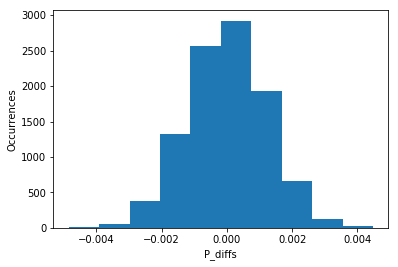

In [34]:
plt.hist(p_diffs);
plt.xlabel('P_diffs')
plt.ylabel('Occurrences')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
p_new_actual = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count() / df2[df2['landing_page'] == "new_page"]['user_id'].count()
p_old_actual = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count() / df2[df2['landing_page'] == "old_page"]['user_id'].count()

#computing the actual difference in p_new and p_old from original dataset
p_actual = p_new_actual -p_old_actual
p_actual


-0.0015790565976871451

In [36]:
#Computing the proportion of p_diffs greater than actual difference
(p_diffs > p_actual).mean()

0.90469999999999995

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**  **P-Value**. P-value of **0.9046** means our statistic likely to come from null hypothesis. Therefore, we are **fail to reject the NULL**.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count() 
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count() 
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
#Computing two sample proportion hypothesis testing
z_score , p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')
z_score,p_value

(-1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**: Z score of -1.311 lies between critical value of -1.96 to +1.96. 
P-value comes out to be 0.9051 which is large. 
Hence, We **fail to REJECT THE NULL HYPOTHESIS.**



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**LOGISTIC REGRESSION**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [42]:
#creating dummy variables for " landing_page " column
df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])
df2.drop('old_page', axis=1 , inplace= True)

#Creating dummy variable for " group " column
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.drop('control', axis=1 , inplace= True)

#creating intercept column
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,ab_page,intercept
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
#instantiating the model
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

#fit the model
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
#dsiplaying model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Mar 2018   Pseudo R-squ.:               8.085e-06
Time:                        05:39:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

In [46]:
np.exp(-0.0150)

0.98511193960306265

In [47]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br> 





**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**: From our model Summary, the p-value associated with ab_page is 0.190 which is greater than common alpha level of 0.05. Therefore, it is not statistically significant in predicting whether user will convert or not on the basis of group to which it belongs.

P value in part 2 is 0.90 suggests that Probability of conversion of user landing on new page is no better than Probability of conversion of user getting old page.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding 
additional terms into your regression model?

**Answer** : **Timestamp** can have significant impact on conversion rate. Whether the day is weekday or weekend can affect the conversion rates. Or there might be more convertions in certain part of the DAY as compared to other.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [48]:
#loading the country dataframe
df_country = pd.read_csv('countries.csv')
df_country.head()

#Merging Country dataframe wwith original dataframe
df2 = df2.merge(df_country)


#creating dummy variables for Country
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])

#Dropping eXtra column to make it FULL RANK matrix
df2.drop('CA', axis=1,inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,ab_page,intercept,country,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,US,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,US,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1,CA,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,1,UK,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1,CA,0,0


In [49]:
#instantiating the model
log_mod_country = sm.Logit(df2['converted'],df2[['intercept','US','UK']])

#Fit the model
results = log_mod_country.fit()


Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


In [50]:
#Displaying the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        06:20:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [51]:
np.exp(0.0408),np.exp(0.0507)

(1.0416437559600236, 1.0520072437650141)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
log_mod_country_page = sm.Logit(df2['converted'],df2[['intercept','new_page','US','UK']])
results = log_mod_country_page.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Mar 2018   Pseudo R-squ.:               2.324e-05
Time:                        06:22:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0150      0.011     -1.308      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [32]:
np.exp(-0.0150), np.exp(0.0408),np.exp(0.0506
                                      )

(0.98461950675173293, 1.0363448963818249, 1.0459232623526911)

In [53]:
1/np.exp(-0.0150),np.exp(0.0357),np.exp(0.0449)

(1.0151130646157189, 1.0363448963818249, 1.0459232623526911)

<a id='conclusions'></a>
## Conclusions

1. From A/B test results, it can be concluded that we fail to reject the NULL hypothesis. That means, new page is no better than old page.

2. From Regression results,it can be predicted that User on old page is 1.01 times more likely to get converted as compared  new page in future.
Also, Conversion rate of users belonging to US and UK is more that users residing in Canada.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.